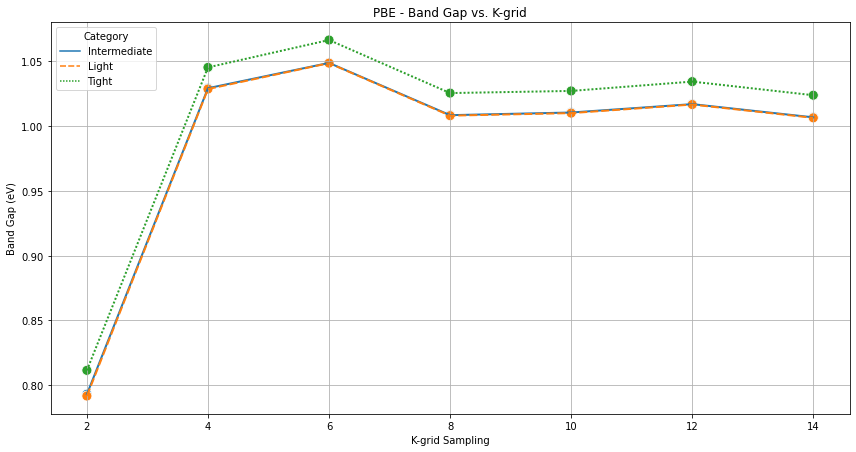

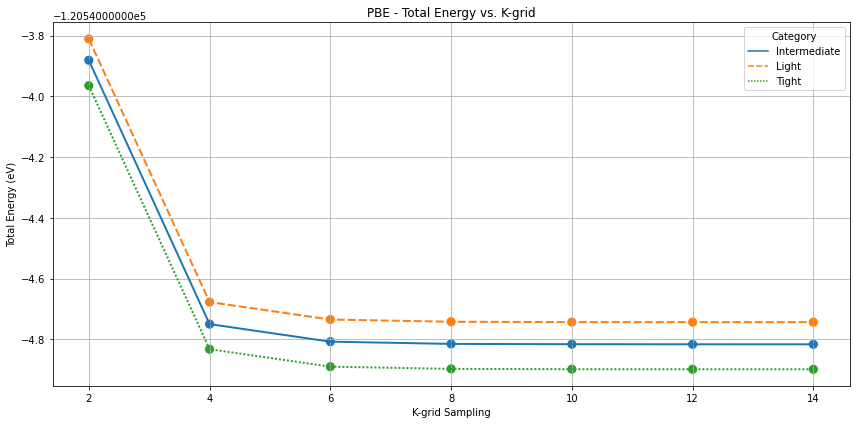

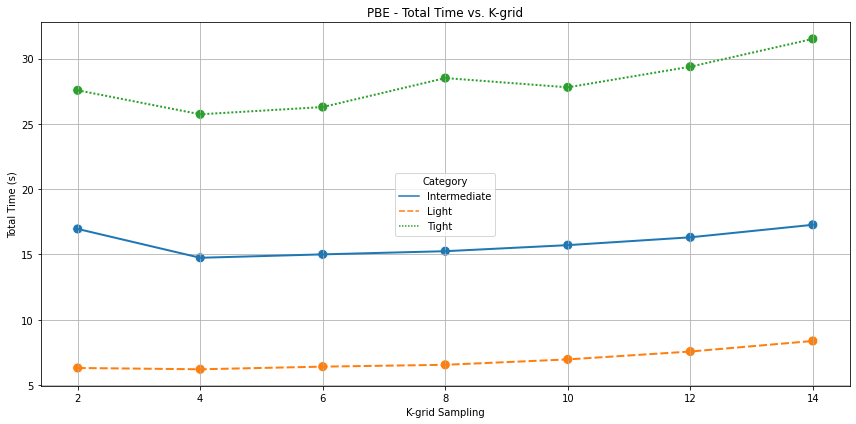

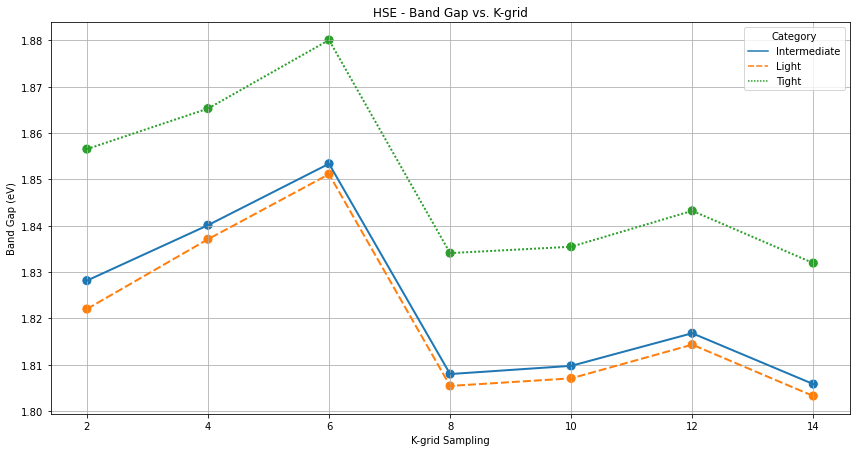

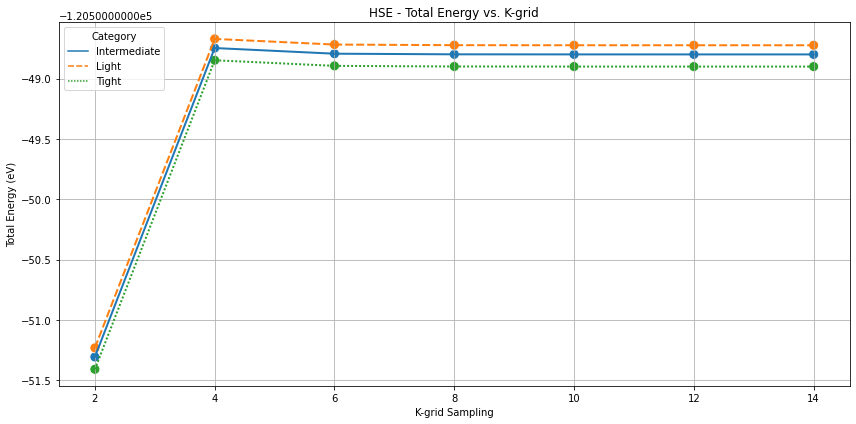

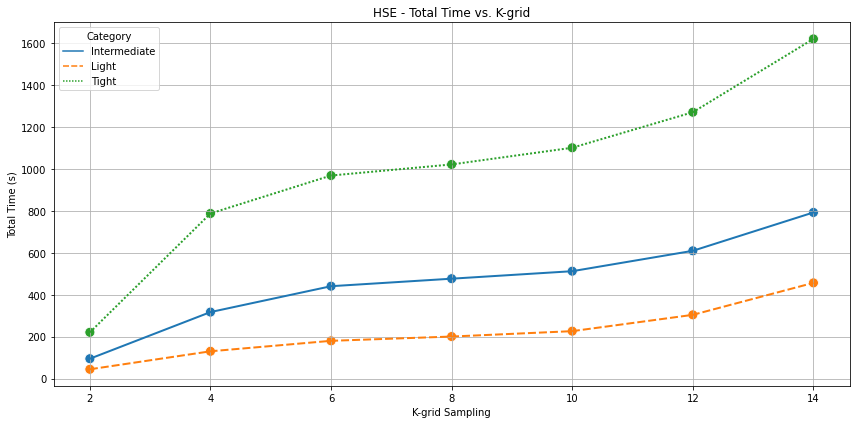

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'extracted_data.csv'
data = pd.read_csv(filename)

data['K-grid'] = data['File'].str.extract(r'(\d+)').astype(int)

pbe_data = data[data['PBE/HSE'] == 'PBE']
hse_data = data[data['PBE/HSE'] == 'HSE']

def plot_calculation(data, calc_type, save_prefix):
    plt.figure(figsize=(12, 18))
    
    plt.subplot(3, 1, 1)
    sns.lineplot(
        data=data,
        x='K-grid',
        y='HOMO-LUMO',
        hue='Category',
        style='Category',
        markers=False,
        palette='tab10',
        linewidth=2
    )
    sns.scatterplot(
        data=data,
        x='K-grid',
        y='HOMO-LUMO',
        hue='Category',
        palette='tab10',
        s=100,
        legend=False
    )
    plt.title(f'{calc_type} - Band Gap vs. K-grid')
    plt.xlabel('K-grid Sampling')
    plt.ylabel('Band Gap (eV)')
    plt.grid(True)
    plt.legend(title="Category")
    plt.tight_layout()
    plt.savefig(f'{save_prefix}_band_gap_vs_kgrid.png')
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=data,
        x='K-grid',
        y='Total Energy',
        hue='Category',
        style='Category',
        markers=False,
        palette='tab10',
        linewidth=2
    )
    sns.scatterplot(
        data=data,
        x='K-grid',
        y='Total Energy',
        hue='Category',
        palette='tab10',
        s=100,
        legend=False
    )
    plt.title(f'{calc_type} - Total Energy vs. K-grid')
    plt.xlabel('K-grid Sampling')
    plt.ylabel('Total Energy (eV)')
    plt.grid(True)
    plt.legend(title="Category")
    plt.tight_layout()
    plt.savefig(f'{save_prefix}_total_energy_vs_kgrid.png')
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=data,
        x='K-grid',
        y='Total Time',
        hue='Category',
        style='Category',
        markers=False,
        palette='tab10',
        linewidth=2
    )
    sns.scatterplot(
        data=data,
        x='K-grid',
        y='Total Time',
        hue='Category',
        palette='tab10',
        s=100,
        legend=False
    )
    plt.title(f'{calc_type} - Total Time vs. K-grid')
    plt.xlabel('K-grid Sampling')
    plt.ylabel('Total Time (s)')
    plt.grid(True)
    plt.legend(title="Category")
    plt.tight_layout()
    plt.savefig(f'{save_prefix}_total_time_vs_kgrid.png')


plot_calculation(pbe_data, 'PBE', 'PBE')

plot_calculation(hse_data, 'HSE', 'HSE')